In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [26]:
!mkdir -p drive
!google-drive-ocamlfuse drive

/bin/sh: 1: google-drive-ocamlfuse: not found


## 1 - Import Libraries

Veri setinin elde edilmesi için keras kütüphanesi,

Matematiksel işlemler ve matrislerin düzenlenmesi için numpy kütüphanesi,

Konvolüsyonel sinir ağının oluşturulması ve eğitilmesi için tensorflow kütüphanesi import edildi.


In [1]:
import numpy as np     # Matematiksel işlemler
import pandas as pd    # Veri setinin düzenlenmesi
import tensorflow as tf  # Sinir ağının kurulması ve eğitilmesi
from sklearn.model_selection import train_test_split    # Eğitim ve Test verilerinin ayrıştırılması
from keras.utils import to_categorical  # Çıktıların kategorize edilmesi
import matplotlib.pyplot as plt # Grafik çizimi
import keras 
from keras.datasets import cifar10  # Veri setini elde etmek için

/home/zekikus/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## 2 - Data Preprocessing

Verinin model tarafından işlenebilecek hale getirilmesi için düzenlenmesi gerekir. 

- İstenen Girdi Formatı:
[Filtre sayısı, Girdi Yüksekliği, Girdi Genişliği, Kanal Sayısı]

Format belirledikten sonra veri seti test,cross_Validation ve train olarak ayrılır.
Aynı zamanda çıktılar 10 sınıftan oluştuğu etiketler one-hot vektöre dönüştürülür.

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
input_shape = [None, 32, 32, 3]
number_of_classes = 10

# Çıktı etiketlerinin one-hot vektöre çevrilmesi
y_train = to_categorical(y_train, number_of_classes)
y_test = to_categorical(y_test, number_of_classes)

## 3 - Dataset Information

CIFAR(Canadian Institute For Advanced Research) veri seti, bilgisayarlı görü(computer vision)
çalışmaları için geliştirilen bir veri setidir. Veri seti Alex Krizhevsky, Vinod Nair ve Geoffrey Hinton
tarafından toplandı. <br/>

CIFAR-10 veri seti 32x32 boyutunda renkli küçük görüntülerden oluşmaktadır. Veri seti 10 sınıf
içermektedir ve sınıf başına 6.000 olmak üzere toplamda 60.000 görüntüden oluşmaktadır.
Bunların 50.000’i eğitim, 10.000’i test için kullanılmaktadır. CIFAR-10 Veri seti şu sınıfları içermektedir:
- Uçak  
- Otomobil
- Kuş
- Kedi
- Geyik
- Köpek
- Kurbağa
- At
- Gemi
- Tır

    <img src="images/cifar10.jpg" style="width:800px;height:500px;">

y =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


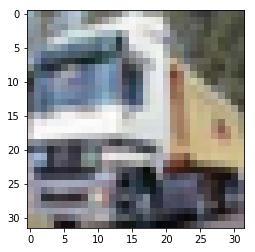

In [11]:
# Veri setinden örnek görüntü ve çıktı
plt.imshow(x_train[1])
print("y = ",y_train[1])

y =  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


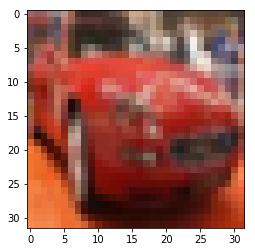

In [12]:
# Veri setinden örnek görüntü ve çıktı
plt.imshow(x_train[5])
print("y = ",y_train[5])

In [4]:
print("Shape of training features: {}".format(x_train.shape))
print("Shape of training lables: {}".format(y_train.shape))
print("Shape of testing features: {}".format(x_test.shape))
print("Shape of testing lables: {}".format(y_test.shape))

Shape of training features: (50000, 32, 32, 3)
Shape of training lables: (50000, 10)
Shape of testing features: (10000, 32, 32, 3)
Shape of testing lables: (10000, 10)


In [5]:
x_train, cv_x, y_train, cv_y = train_test_split(x_train, y_train, 
                                                test_size = 5000, random_state = 42)

print("Number of examples in training set: {}".format(x_train.shape[0]))
print("Number of examples in cross validation set: {}".format(cv_x.shape[0]))

Number of examples in training set: 45000
Number of examples in cross validation set: 5000


In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## 4 - Define Functions

In [0]:
# Hiper parametreler
learning_rate = 0.01
epoch = 50
batch_size = 32

In [ ]:
#Konvolüsyon katmanındaki ilk ağırlıkların standart sapması 0.1 olan normal dağılıma göre ataması yapılır.
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(init_random_dist)

#Bias değerleri 0.1 olarak atanır.
def init_bias(shape):
    init_bias_vals = tf.constant(0.1, shape=shape)
    return tf.Variable(init_bias_vals)

### 4.1 Convolution Layer

Bu bölümde konvolüsyon işleminden ve konvolüsyon katmanından bahsedeceğiz. Konvolüsyon katmanı temelde şu adımlardan oluşur:

- Belirli bir boyuta sahip girdi alır.
- Girdinin her pozisyonuna filtre uygular.
- Belirlenen parametrelere göre farklı veya aynı boyutta bir çıktı verir.

Konvolüsyon işlemi verilen girdi üzerindeki özellik haritalarının keşfedilmesi için kullanılır. Bu özelliklerin doğru bir şekilde keşfedilmesi için filtre boyutu ve adım sayısı gibi parametreler çok önemlidir.

 - **Adım Sayısı(Stride):** Filtre adım sayısını belirtir.
 - **Dış boşluk(Padding):** Filtrele eklenecek dış boşluk sayısını belirtir. Padding genel olarak girdi ile çıktı boyutunun aynı olmasının istendiği durumlarda eklenir.
 - Son olarakta filtre boyutu belirlenir.
 
**Bu Parametreler Nasıl Seçilmeli:** Konvolüsyon katmanında seçilen parametreler sonucu doğrudan etkilemektedir. Adım sayısının ve filtre boyutunun büyük seçilmesi, girdi üzerindeki birçok özelliğin kaybedilmesine neden olabilir. Aynı zamanda adım sayısı ve filtre boyutunun küçük seçilmesi özelliklerin yakalanmasını sağlayabilir fakat hesaplama süresini ve işlem yükünü arttırabilir. Bu nedenlerden dolayı bu parametrelerin doğru bir şekilde seçilmesi çok önemlidir.

Aşağıdaki şekilde tek kanaldan oluşan bir girdi için konvolüsyon işlemi gösterilmektedir.

<img src="images/Convolution_schematic.gif" style="width:400px;height:300px;">

Aşağıdaki şekilde kanal sayısı 3 olan bir girdi üzerine 3x3x3 boyutunda bir filtre uygulanması sonucu elde edilen
3x3x2 boyutunda çıktı görülmektedir. Çıktı boyutuna bakıldığında, 3-> genişlik, 3->yükseklik ve 2->filtre sayısını temsil etmektedir

<img src="images/1.gif" style="width:600px;height:400px;">
<img src="images/rgb.gif" style="width:600px;height:400px;">


**Hatırlatıcı:**
    Konvolüsyon işleminden sonra elde edilecek çıktıların boyutu şu işlemlere göre hesaplanır:
    $$ n_H = \lfloor \frac{n_{H_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
    $$ n_W = \lfloor \frac{n_{W_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
    $$ n_C = \text{Konvolüsyonda kullanılan filtre sayısı}$$
    
### 4.2 Rectifier Linear Unit (ReLu)
- Her konvolüsyon katmanından sonra uygulanır.
- Girdi içerisindeki bütün negatif piksel değerlerini, sıfır ile değiştirir.

<img src="images/relu.png" style="width:300px;height:200px;">

ReLu, tanh ve eş değelerinden birkaç kat daha hızlı çalışır.<br/><br/>
ReLu'nun daha iyi olmasının nedeni kabaca doyum noktası olmamasıdır(non-saturating). ReLu aktivasyon fonksiyonu f(x) = max(0,x) şeklinde formüle edilir. Yani bütün değerler [0, +sonsuz] aralığındadır.<br/><br/>
Fakat diğer aktivasyon fonksiyonlarına baktığımızda;<br/><br/>
Sigmoid = [0,1] aralığına ve tanh = [-1,1] aralığına noktaları indirger. Çok derin sinir ağlarında bu fonksiyonlar belirli bir noktadan sonra doyuma ulaşır. Fakat ReLu'da durum böyle değildir. Bu yüzden tercih edilir.

In [ ]:
# Konvolüsyon işlemini gerçekleştiren fonksiyon tanımlanır.
# Parametreler:
# Stride: Adım sayısı her zaman 1 olarak seçilmiş. Değiştirilebilir.
# Padding: SAME olarak seçilmiş. Yani konvolüsyon işlemi uygulandıktan sonra çıktı boyutu küçülmeyecek.
# Girdi ve çıktı boyutu aynı kalacak. Resim boyutu küçük olduğu için kullanıldı.
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

    
# Konvolüsyon katmanı işlemleri gerçekleştirilir.
# Konvolüsyon -> ReLu
def convolutional_layer(input_x, shape):
    W = init_weights(shape)
    b = init_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x, W) + b)

# Alternatif olarak Tensorflow son versiyon ile gelen fonksiyon kullanılabilir. "nn.conv2d" ve "layers.conv2d"
# neredeyse aynıdır. Fakat "layers.conv2d" yapılandırıcısı çok daha fazla parametreye sahiptir ve daha esnektir.
tf.layers.conv2d(inputs=x,filters=32, kernel_size = [3,3], padding="same", activation=tf.nn.relu)


### 4.3 Pooling Layer
Havuzlama(Pooling) katmanı, girdinin yüksekliğini ve genişliğini azaltır. Hesaplama yükünü azaltmaya yardımcı olur. Sıklıkla kullanılan iki tür havuzlama(pooling) yöntemi vardır:

- **Max-pooling layer:** Maksimum havuzlama yönteminde, belirli bir adım değerine(stride) göre havuzlama filtresi girdi üzerinde dolaşır ve girdi üzerinde filtrenin bulunduğu alana karşılık gelen kısım içerisindeki maksimum değeri, çıktıda karşılık gelen alana yerleştirir.
- **Average-pooling layer:** Aynı işlem ortalama havuzlama işlemi için de geçerlidir. Fakat bu sefer maksimum eleman yerine girdide filtrenin bulunduğu alana karşılık gelen kısımdaki değerlerin ortalaması çıktı olarak verilir.
<img src="images/Stride_2_Max_Avg_Pooling.png" style="width:600px;height:300px;"><br/>
<img src="images/pooling.gif" style="width:400px;height:200px;">

**Hatırlatıcı:**
    Dış boşluk(padding) olmadığı için havuzlama işlemi sonrası elde edilecek çıktı boyutu aşağıdaki formüllere göre hesaplanır. Dikkat edilirse havuzlama işleminden sonra kanal sayısı değişmemektedir. Ayrıca konvolüsyon katmanından farklı olarak havuzlama katmanından öğrenilmesi gereken bir parametre yoktur. Sadece adım sayısı ve filtre boyutu belirlenir. Konvolüsyon işleminde ise filtre katsayıları belirli bir öğrenme algoritmasına göre öğrenilip, güncellenir.
    $$ n_H = \lfloor \frac{n_{H_{prev}} - f}{stride} \rfloor +1 $$
    $$ n_W = \lfloor \frac{n_{W_{prev}} - f}{stride} \rfloor +1 $$
    $$ n_C = n_{C_{prev}}$$

In [ ]:
# Maksimum havuzlama işlemini gerçekleştiren fonksiyon tanımlanır.
# Parametreler:
# Stride: Adım sayısı her zaman 2 olarak seçilmiş. Değiştirilebilir.
# ksize: Kernel size, Filter size aynı şey. Filtre boyutu seçilmiş.
def max_pool_2by2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],strides=[1, 2, 2, 1])

# Alternatif
tf.layers.max_pooling2d(inputs=convo_2, pool_size=[2, 2], strides=2)

### 4.4 Fully Connected Layer

Çok katmanlı yapay sinir ağlarında olduğu gibi birbirlerine tamamen bağlı olan nöronları içerir. Daha önceki katmanda öğrenilen özelliklere göre girdinin sınıflandırılması yapılır. 

<img src="images/fully_connected.png" style="width:600px;height:300px;">

In [ ]:
# Tam Bağlantılı Katman fonksiyonu oluşturulur.
def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer, W) + b

# Alternatif
tf.layers.dense(inputs=flatten, units = 512, activation=tf.nn.relu)

### 4.5 Softmax

Softmax fonksiyonu yapay sinir ağı tarafından üretilen skor değerlerini kullanarak olasılık temelli loss değeri üretmektedir. Softmax sonucunda test girdisinin her bir sınıfa ait benzerliği için olasılık değeri üretilir. Yapay sinir ağı modelinin çıktı olarak verdiği skor değerler normalize edilmemiş değerlerdir. Softmax bu değerleri normalize ederek olasılık değerlerine dönüştürmektedir. Olasılık değerine dönüştürme işlemini istatistikte sıkça kullanılan en çok olabilirlik (maximum likelihood) fonksiyonuyla yapmaktadır. Değerler çok büyük değerler olduğu için likelihood fonksiyonun log'nu alarak dağılımın yapısını korumaktadır.
<img src="images/softmax.png" style="width:600px;height:300px;">

## 5 - Create Model

In [0]:
#Tensorflow Graph Oluşturulması

# Graph Reset
tf.reset_default_graph()

# Placeholder tanımlama
x = tf.placeholder(tf.float32,shape=[None,32,32,3])
y_true = tf.placeholder(tf.float32,shape=[None,10])
train_mode = tf.placeholder(tf.bool)

config = tf.ConfigProto(allow_soft_placement=True)
config.gpu_options.allow_growth = True
config.gpu_options.allocator_type = 'BFC'

with tf.name_scope('Model'):
    #Convolutional Layer 1 + RELU
    convo_1 = tf.layers.conv2d(inputs=x,filters=32, kernel_size = [3,3], padding="same", activation=tf.nn.relu)
    #Convolutional Layer 2 + RELU
    convo_2 = tf.layers.conv2d(inputs=convo_1,filters=32, kernel_size = [3,3], activation=tf.nn.relu)
    #Pooling Layer 1
    pooling_1 = tf.layers.max_pooling2d(inputs=convo_2, pool_size=[2, 2], strides=2)
    dropout_1 = tf.layers.dropout(pooling_1,rate=0.25, training= train_mode)
    
    #Convolutional Layer 3 + RELU
    convo_3 = tf.layers.conv2d(inputs=dropout_1,filters=64, kernel_size = [3,3], padding="same", activation=tf.nn.relu)
    #Convolutional Layer 4 + RELU
    convo_4 = tf.layers.conv2d(inputs=convo_3,filters=64, kernel_size = [3,3], activation=tf.nn.relu)
    #Pooling Layer 2
    pooling_2 = tf.layers.max_pooling2d(inputs=convo_4, pool_size=[2, 2], strides=2)
    dropout_2 = tf.layers.dropout(pooling_2,rate=0.25, training= train_mode)
    
    #Flattening
    flatten = tf.reshape(dropout_2,[-1,6*6*64])
    #Fully Connected 1 + RELU
    full_layer_one = tf.layers.dense(inputs=flatten, units = 512, activation=tf.nn.relu)
    #Dropout Layer 1
    full_one_dropout = tf.layers.dropout(full_layer_one,rate=0.5, training= train_mode)
    #Output Layer,containing 2 output nodes.
    y_pred = tf.layers.dense(inputs=full_one_dropout,units=10)

# Kayıp Fonksiyonu
# Softmax girdinin her bir sınıfa ne kadar benzediğine dair olasılık değeri üretmektedir.
with tf.name_scope('Loss'):
    loss = tf.losses.softmax_cross_entropy(y_true, y_pred)

# Optimizer Fonksiyonu
with tf.name_scope('ADAM'):
     train_op = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(loss)

# Performans Metriği
with tf.name_scope('Accuracy'):
    accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_true, 1)), tf.float32))

In [15]:
with tf.Session(config=config) as sess:
    sess.run(tf.global_variables_initializer())
    
    # Create mini batches and train data
    
    total_size = x_train.shape[0]
    number_of_batches = int(total_size/batch_size)
    
    print("Training:Start")
    for e in range(epoch):
        epoch_cost = 0
        epoch_accuracy = 0
        for i in range(number_of_batches):
            mini_x = x_train[i*batch_size:(i+1)*batch_size, :, :, :]
            mini_y = y_train[i*batch_size:(i+1)*batch_size, :]
            _, cost = sess.run([train_op,loss], feed_dict={x:mini_x, y_true:mini_y,train_mode:True})
            train_accuracy = sess.run(accuracy, feed_dict={x:mini_x, y_true:mini_y,train_mode:False})
            epoch_cost += cost
            epoch_accuracy += train_accuracy
        
        #If the total number of training examles is not exactly divisible by batch_size, 
        #we have one more batch of size (total_size - number_of_batches*batch_size)
        if total_size % batch_size != 0:
            mini_x = x_train[number_of_batches*batch_size:total_size, :, :, :]
            mini_y = y_train[number_of_batches*batch_size:total_size, :]
            _, cost = sess.run([train_op, loss], feed_dict={x:mini_x, y_true:mini_y, train_mode:True})
            train_accuracy = sess.run(accuracy, feed_dict={x:mini_x,y_true:mini_y, train_mode:False})
            epoch_cost += cost
            epoch_accuracy += train_accuracy
        
        epoch_cost /= number_of_batches
        
        if total_size % batch_size != 0:
            epoch_accuracy /= (number_of_batches+1)
        else:
            epoch_accuracy /= number_of_batches
        print("Epoch: {} Cost: {} accuracy: {} ".format(e+1, np.squeeze(epoch_cost), epoch_accuracy))
    
    #Cross validation loss and accuracy
    cv_loss, cv_accuracy = sess.run([loss, accuracy], {x:cv_x, y_true:cv_y, train_mode: False})
    print("Cross validation loss: {} accuracy: {}".format(np.squeeze(cv_loss), cv_accuracy))
    
    #prediction for test set
    test_accuracy = sess.run(accuracy,{x:x_test, y_true:y_test,train_mode:False})
    print("Test set accuracy {}".format(test_accuracy))

Training:Start
Epoch: 1 Cost: 1.8016789558941066 accuracy: 0.3664490049751244 
Epoch: 2 Cost: 1.440381073256475 accuracy: 0.5108386638237384 
Epoch: 3 Cost: 1.3126959957150612 accuracy: 0.5708733120113717 
Epoch: 4 Cost: 1.2200947013467678 accuracy: 0.6069207533759773 
Epoch: 5 Cost: 1.1501501446343418 accuracy: 0.6351057213930348 
Epoch: 6 Cost: 1.0902257096631767 accuracy: 0.6599147121535182 
Epoch: 7 Cost: 1.0366249620744887 accuracy: 0.6813921464108031 
Epoch: 8 Cost: 0.9880126613175038 accuracy: 0.7002931769722814 
Epoch: 9 Cost: 0.9494544973922827 accuracy: 0.7168843283582089 
Epoch: 10 Cost: 0.9173929581304702 accuracy: 0.7320318052594172 
Epoch: 11 Cost: 0.8806857776167043 accuracy: 0.74613539445629 
Epoch: 12 Cost: 0.8513323084516172 accuracy: 0.7569740582800284 
Epoch: 13 Cost: 0.8198776644671795 accuracy: 0.7707444918265813 
Epoch: 14 Cost: 0.7936121667516689 accuracy: 0.7823605188343994 
Epoch: 15 Cost: 0.7675969636075697 accuracy: 0.7938210732054015 
Epoch: 16 Cost: 0.7430

## 6. Plots

Konvolüsyonel sinir ağlarında parametrelerin doğru seçilmesi başarıyı doğrudan etkilemektedir. Bu bölümde farklı parametrelerin sonucu nasıl etkilediğine dair grafikler verilmiştir ve doğru sinir ağı tasarımının nasıl olması gerektiğine yoğunlaşılmıştır.

Parametre değişikliklerini temsil etmek için aksi belirtilmedikçe aynı model kullanılmıştır. Kullanılan model 4 konvolüsyon, 2 havuzlama, 3 droput, 5 ReLu ve 1 gizli katmandan oluşmaktadır.

**Konvolüsyonel Sinir Ağı Mimarisi:** <br/>
Input --> Conv --> ReLu --> Conv --> ReLu --> Pooling --> Dropout --> Conv --> ReLu --> Conv --> ReLu --> Pooling
        --> Flatten --> Hidden Layer 1 --> ReLu --> Output

### 6.1 Different Filter Size

<img src="Plots/CIFAR10_Filter_3_5.png" style="width:600px;height:400px;"><br/>
<img src="Plots/CIFAR-10_Diff_Filter_Size.png" style="width:600px;height:400px;"><br/>
<img src="Plots/CIFAR10_Filter_3_5_7_Bar.png" style="width:600px;height:400px;"><br/>
<img src="Plots/Different_Fİlter_Tİme.png" style="width:600px;height:400px;"><br/>

**Yorum:** Farklı filtre sayıları sonucu farklı olarak etkilemiştir. Filtre boyutunun küçük seçilmesi görüntü üzerindeki özelliklerin daha iyi yakalanmasını sağlar fakat hesaplama zamanını arttırır. Aynı zamanda filtre boyutunun büyük seçilmesi görüntü üzerideki bazı özelliklerin kaybedilmesine neden olur. Bu yüzden filtre boyutu doğru bir şekilde seçilmelidir.

<br/>
### 6.2 Different Channel Count

<img src="Plots/CIFAR10_ChannelCount.png" style="width:600px;height:400px;"><br/>
<img src="Plots/CIFAR10_ChannelCount_Bar.png" style="width:600px;height:400px;"><br/>
<img src="Plots/Different_ChannelCount_Tİme.png" style="width:600px;height:400px;"><br/>

**Yorum:** İdeal konvolüsyonel sinir ağ tasarımına bakıldığında derinlik arttıkça görüntü boyutunun küçültülmesi, kanal sayısının arttırılması gerekmektedir. Kanal sayısının arttırılması elde edilen özellik sayısını arttıracaktır. Daha fazla özellik çıkarımı sağlanarak sinir ağı daha iyi eğitilecektir. Fakat bunu yaparken görüntü boyutunun belirli bir değere kadar küçültülmesi gerekir. Aksi halde çok fazla hesaplama yükü gerekir.

### 6.3 Different Batch Size

<img src="Plots/CIFAR10_BatchSize.png" style="width:600px;height:400px;"><br/>
<img src="Plots/CIFAR10_BatchSize_Bar.png" style="width:600px;height:400px;"><br/>
<img src="Plots/Different_Batch_Tİme.png" style="width:600px;height:400px;"><br/>

**Yorum:** Batch değerinin yüksek seçilmesi eğitim sırasında bazı bilgilerin kaybına ve ağırlıkların doğru bir şekilde güncellenememesine, yani yanlış öğrenmeye neden olabilir. Küçük batch değerleri doğruluk oranını arttırabilir fakat hesaplama zamanını da arttırır. Bu yüzden batch değerleri veri setine ve oluşturulan mimariye uygun olarak seçilmelidir.

### 6.4 Pooling Method

<img src="Plots/CIFAR10_PoolingMethod.png" style="width:600px;height:400px;"><br/>
<img src="Plots/CIFAR10_PoolingMethod_Bar.png" style="width:600px;height:400px;"><br/>


### 6.5 Different Models

<img src="Plots/CIFAR10_Model1vsModel2.png" style="width:600px;height:400px;"><br/>
<img src="Plots/CIFAR10_Model1vsModel2_Bar.png" style="width:600px;height:400px;"><br/>

**Yorum:** Bu bölümde, bölümün başında varsayılan olarak belirtilen Model1 ile havuzlama katmanının yerinin değiştirilmesi ile oluşan Model2 karşılaştırılmıştır. Model2, Model1 den farklı olarak şu şekilde tasarlanmıştır:

**Conv + ReLu --> Pooling --> Conv + ReLu  --> Dropout --> Conv + ReLu --> Pooling --> Conv + ReLu --> Dropout**

### 6.6 Different Kernel Initializer

<img src="Plots/CIFAR10_Initializers.png" style="width:600px;height:400px;"><br/>
<img src="Plots/CIFAR10_Initializers_Bar.png" style="width:600px;height:400px;"><br/>


### 6.7 Different Regularization

<img src="Plots/CIFAR10_Regularization.png" style="width:600px;height:400px;"><br/>
<img src="Plots/CIFAR10_Regularization_Bar.png" style="width:600px;height:400px;"><br/>

### 6.8 Different Dropout Rate

<img src="Plots/CIFAR10_Dropouts.png" style="width:600px;height:400px;"><br/>
<img src="Plots/CIFAR10_Dropouts_Bar.png" style="width:600px;height:400px;"><br/>

**Yorum:** Aşırı öğrenmeyi(Overfitting) azaltmak için kullanılan Dropout yönteminde "dropout rate" değeri doğru bir şekilde seçilmelidir. Kullanılan veri seti ve katmanlarda kullanılan düğüm sayısına göre dropout rate değeri belirlenmelidir. Daha az derin ağlarda ve düğüm sayısının az olduğu katmanlarda dropout değeri 0.5 değerinin üzerinde tutulmamalıdır. Düşük "dropout rate" değeri overfitting, yüksek "dropout rate" değeri underfitting oluşturmaktadır.

### 6.9 Different Models

<img src="Plots/3Modelvs.png" style="width:600px;height:400px;"><br/>
<img src="Plots/3ModelvsBar.png" style="width:600px;height:400px;"><br/>
<img src="Plots/Different_Model_Tİme.png" style="width:600px;height:400px;"><br/>

**Yorum:** 
- **Model1:**<br/>
    Flatten(6x6x128)<br/>
    Hidden Layer 1 + ReLu (512 Unit)<br/>
    Dropout Layer(0.5 Dropout Rate)<br/>
    Hidden Layer 2 + ReLu (1024 Unit)<br/>
    Dropout Layer(0.5 Dropout Rate)<br/>
    Output <br/>
    
  **Model2:**<br/>
    Flatten(6x6x128)<br/>
    Hidden Layer 1 + ReLu (512 Unit)<br/>
    Dropout Layer(0.25 Dropout Rate)<br/>
    Hidden Layer 2 + ReLu (1024 Unit)<br/>
    Dropout Layer(0.75 Dropout Rate)<br/>
    Output
    
  **Model3:**<br/>
    Flatten(6x6x128)<br/>
    Hidden Layer 1 + ReLu (512 Unit)<br/>
    Dropout Layer(0.25 Dropout Rate)<br/>
    Output
    
    Sonuçlarda görüldüğü gibi kompleks veya daha derin modeller kurmak her zaman başarı sonuçlar elde edileceği anlamına gelmez. Hatta klasik konvolüsyonel sinir ağlarında ard arda dizilen çok katmandan oluşan modellerin, derinlik arttıkça belirli bir yere kadar başarılı değerler verdiği, fakat belirli bir derinlikten sonra beklenenin aksine hatanın arttığı görülmüştür. Bunun nedeni derinlik arttıkça ilk katmanlarda öğrenilen özelliklerin ileriye gidildikçe kaybedilmesindendir. Bunu çözmek için geliştirilen ResNet ve DenseNet gibi mimariler vardır. Bu mimariler özellik paylaşımını arttırmaktadır.